<a href="https://colab.research.google.com/github/natasyafebryani/Jakarta-Post-Covid-19-Mobility-Prediction/blob/main/DSA_BNCC_Yellow_Potathree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Pada awal Februari 2022, Kementrian Kesehatan menyatakan bahwa Indonesia mulai memasuki gelombang tiga virus Covid-19. Berdasarkan data dari Badan Pusat Statistik, aktivitas pada tempat perdagangan ritel dan rekreasi mengalami penurunan sebesar 3,63% pada Februari 2022 dibandingkan Januari 2022. Tempat belanja dan kebutuhan sehari-hari juga mengalami penurunan, yaitu dari 27,55% pada Januari 2022 menjadi 25,72% pada Februari 2022. Sedangkan mobilitas masyarakat di rumah mengalami peningkatan sebesar 14,89% dibandingkan Januari 2022.

Berdasarkan informasi yang diperoleh dari situs Merdeka.com, jumlah kasus aktif di Indonesia pada akhir bulan Maret 2022 terdapat peningkatan sebesar 4.189 kasus, yaitu mencapai 5.995.876 jumlah kasus dari yang sebelumnya sebanyak 5.991.687 kasus. Namun, seiring berjalannya proses vaksinasi dan terus meningkat dengan status vaksin dosis 1 dan 2 rata-rata seluruh provinsi mencapai 70%, serta status vaksin dosis 3 atau vaksin booster sudah mencapai 10% pada bulan April 2022, pemerintah melonggarkan status PPKM. Untuk luar Jawa-Bali, Kasus Konfirmasi Harian juga menunjukkan penurunan. Walaupun di beberapa provinsi kasus aktif masih relatif tinggi, tetapi tidak ada peningkatan yang signifikan.

Menurunnya kasus Covid-19 pada awal April 2022, dimana kegiatan tatap muka sudah diberlakukan 100% terbatas demi terealisasinya pemulihan ekonomi nasional, menyebabkan peningkatan mobilitas warga pada rentang 29 Maret - 4 April 2022 sebanyak 11,57% dibandingkan 24 Februari - 2 Maret 2022. Khususnya di beberapa sektor, seperti tempat perbelanjaan meningkat sebesar 2,10%, aktivitas di taman meningkat sebesar 24,8%, aktivitas di tempat kerja meningkat hingga mencapai angka positif 6,23% dibandingkan sebelumnya minus 6,57%.

Di awal Juni 2022, dilaporkan terdeteksi munculnya kasus subvarian Covid-19 baru, yaitu varian Omicron BA.4 dan BA.5. Varian ini dinilai memiliki peluang penyebaran yang lebih cepat dibanding varian BA.1 dan BA.2, di mana, perkembangan kasusnya berada di kisaran 12-13%. Hal ini terbukti dari semakin meningkatnya kasus Covid harian semenjak munculnya subvarian tersebut. Dibandingkan pada rentan waktu bulan Mei 2022 yang jumlah kasusnya berkisar 200-300 per harinya, semenjak munculnya subvarian baru ini, angka kasus harian terus meningkat setiap harinya hingga mencapai di atas 1.000-2.000 kasus. 

Dengan kembali meningkatnya kasus Covid di Indonesia, kedepannya apakah mobilitas penduduk akan terpengaruh dan sektor manakah yang menerima dampak terbesar dari kenaikan kasus tersebut?

# **Data Cleaning & Preprocessing**

### **Import Datasets & Libraries**

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

Import Dataset 1 (Daily Update Data Agregat Covid-19 Jakarta - Data Indonesia dan Jakarta)

In [ ]:
# Importing Dataset 1 from Github -> Daily Update Data Agregat Covid-19 Jakarta - Data Indonesia dan Jakarta
url1 = 'https://raw.githubusercontent.com/Graceliora/Datasets-DSA---BNCC-Yellow-Potathree/main/Daily%20Update%20Data%20Agregat%20Covid-19%20Jakarta%20-%20Data%20Indonesia%20dan%20Jakarta.csv'
ds1 = pd.read_csv(url1, sep=';')

# Removing 2020's Data
ds1 = ds1.drop(ds1.index[:307])

# Resetting Index
ds1 = ds1.reset_index(drop=True)

# Removing Recent's Data (June 29 - now)
ds1 = ds1.iloc[:-3]

# Displaying Current Dataset 1
ds1

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,01/01/2021,751.270,111.005,617.936,22.329,3.308,166.512,10.082,5.789,185.691,...,8.072,1.042,6.839,191.0,21,1.631,336.0,-32.00,1.956,304.0
1,02/01/2021,758.473,110.400,625.518,22.555,3.334,168.781,10.872,4.599,187.586,...,7.203,-605.000,7.582,226.0,26,2.269,790.0,-1.19,1.895,-400.0
2,03/01/2021,765.350,110.679,631.937,22.734,3.345,170.510,10.978,4.410,189.243,...,6.877,279.000,6.419,179.0,11,1.729,106.0,-189.00,1.657,-83.0
3,04/01/2021,772.103,110.089,639.103,22.911,3.369,173.036,10.371,4.299,191.075,...,6.753,-590.000,7.166,177.0,24,2.526,-607.0,-111.00,1.832,-718.0
4,05/01/2021,779.548,110.693,645.746,23.109,3.392,174.131,10.897,4.479,192.899,...,7.445,604.000,6.643,198.0,23,1.095,526.0,180.00,1.824,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,24/06/2022,6.076.894,13.214,5.906.969,156.711,15.313,1.240.028,7.301,522.000,1.263.164,...,2.069,1.066,998.000,5.0,2,669.000,587.0,8.00,1.266,595.0
540,25/06/2022,6.078.725,13.968,5.908.043,156.714,15.313,1.240.738,7.596,562.000,1.264.209,...,1.831,754.000,1.074,3.0,0,710.000,295.0,40.00,1.045,335.0
541,26/06/2022,6.080.451,14.516,5.909.218,156.717,15.313,1.241.429,7.931,591.000,1.265.264,...,1.726,548.000,1.175,3.0,0,691.000,335.0,29.00,1.055,364.0
542,27/06/2022,6.072.918,11.391,5.904.825,156.702,15.313,1.242.286,7.901,602.000,1.266.102,...,-7.533,-3.125,-4.393,-15.0,0,857.000,-30.0,11.00,838.000,-19.0


In [ ]:
# Split Dataset 1 to Indonesia's Data
ds1_idn = ds1[['Tanggal','Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)', 'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']]

# Displaying Indonesia's Data
ds1_idn

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
0,01/01/2021,751.270,111.005,617.936,22.329,8.072,1.042,6.839,191.0
1,02/01/2021,758.473,110.400,625.518,22.555,7.203,-605.000,7.582,226.0
2,03/01/2021,765.350,110.679,631.937,22.734,6.877,279.000,6.419,179.0
3,04/01/2021,772.103,110.089,639.103,22.911,6.753,-590.000,7.166,177.0
4,05/01/2021,779.548,110.693,645.746,23.109,7.445,604.000,6.643,198.0
...,...,...,...,...,...,...,...,...,...
539,24/06/2022,6.076.894,13.214,5.906.969,156.711,2.069,1.066,998.000,5.0
540,25/06/2022,6.078.725,13.968,5.908.043,156.714,1.831,754.000,1.074,3.0
541,26/06/2022,6.080.451,14.516,5.909.218,156.717,1.726,548.000,1.175,3.0
542,27/06/2022,6.072.918,11.391,5.904.825,156.702,-7.533,-3.125,-4.393,-15.0


In [ ]:
# Split Indonesia's Data to Frequency & Cumulative Frequency - Frequency
ds1_idn_f = ds1_idn[['Tanggal', 'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']]

# Displaying Indonesia's Data by Frequency
ds1_idn_f

,Tanggal,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
0,01/01/2021,8.072,1.042,6.839,191.0
1,02/01/2021,7.203,-605.000,7.582,226.0
2,03/01/2021,6.877,279.000,6.419,179.0
3,04/01/2021,6.753,-590.000,7.166,177.0
4,05/01/2021,7.445,604.000,6.643,198.0
...,...,...,...,...,...
539,24/06/2022,2.069,1.066,998.000,5.0
540,25/06/2022,1.831,754.000,1.074,3.0
541,26/06/2022,1.726,548.000,1.175,3.0
542,27/06/2022,-7.533,-3.125,-4.393,-15.0


In [ ]:
# Split Indonesia's Data to Frequency & Cumulative Frequency - Cumulative Frequency
ds1_idn_cf = ds1_idn[['Tanggal', 'Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']]

# Displaying Indonesia's Data by Frequency
ds1_idn_cf

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia)
0,01/01/2021,751.270,111.005,617.936,22.329
1,02/01/2021,758.473,110.400,625.518,22.555
2,03/01/2021,765.350,110.679,631.937,22.734
3,04/01/2021,772.103,110.089,639.103,22.911
4,05/01/2021,779.548,110.693,645.746,23.109
...,...,...,...,...,...
539,24/06/2022,6.076.894,13.214,5.906.969,156.711
540,25/06/2022,6.078.725,13.968,5.908.043,156.714
541,26/06/2022,6.080.451,14.516,5.909.218,156.717
542,27/06/2022,6.072.918,11.391,5.904.825,156.702


Importing Dataset 2 (Google Covid-19 Community Mobility Reports)

In [ ]:
# Importing Dataset 2 from Github -> Google Covid-19 Community Mobility Reports -> 2021
url2_2021 = 'https://raw.githubusercontent.com/Graceliora/Datasets-DSA---BNCC-Yellow-Potathree/main/2021_ID_Region_Mobility_Report.csv'
ds2_2021 = pd.read_csv(url2_2021, sep=',')

# Displaying Current Dataset 2 -> 2021
ds2_2021

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-01,-25,-8,18,-42.0,-66,19
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-02,-20,3,0,-27.0,-32,11
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-03,-21,-2,-6,-22.0,-9,9
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-04,-15,5,-5,-26.0,-24,11
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-05,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12770,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-12-27,26,54,36,-5.0,-18,3
12771,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-12-28,27,58,45,0.0,-17,1
12772,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-12-29,33,63,56,-2.0,-15,2
12773,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-12-30,33,59,46,5.0,-17,2


In [ ]:
# Importing Dataset 2 from Github -> Google Covid-19 Community Mobility Reports -> 2022
url2_2022 = 'https://raw.githubusercontent.com/Graceliora/Datasets-DSA---BNCC-Yellow-Potathree/main/2022_ID_Region_Mobility_Report.csv'
ds2_2022 = pd.read_csv(url2_2022, sep=',')

# Displaying Current Dataset 2 -> 2022
ds2_2022

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-01,3,24,46,-15.0,-49,6
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-02,11,35,28,-4.0,-4,3
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-03,14,36,20,-9.0,-10,4
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-04,11,33,15,-9.0,-8,4
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-05,12,34,17,-10.0,-7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-24,27,60,40,7.0,11,20
6261,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-25,31,62,45,9.0,13,18
6262,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-26,31,65,42,9.0,47,16
6263,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-27,43,74,83,23.0,7,17


In [ ]:
# Split Dataset 2_2021 to Indonesia's Data
ds2_2021_idn = ds2_2021.head(365)

# Removing Unecessary Columns
ds2_2021_idn = ds2_2021_idn.drop(ds2_2021_idn.columns[[0, 2, 3, 4, 5, 6, 7]], axis=1)

# Displaying Indonesia's Data 2021
ds2_2021_idn

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,-25,-8,18,-42.0,-66,19
1,Indonesia,2021-01-02,-20,3,0,-27.0,-32,11
2,Indonesia,2021-01-03,-21,-2,-6,-22.0,-9,9
3,Indonesia,2021-01-04,-15,5,-5,-26.0,-24,11
4,Indonesia,2021-01-05,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...
360,Indonesia,2021-12-27,9,26,13,-14.0,-17,6
361,Indonesia,2021-12-28,11,31,19,-11.0,-17,5
362,Indonesia,2021-12-29,13,32,22,-12.0,-17,5
363,Indonesia,2021-12-30,16,38,24,-6.0,-17,5


In [ ]:
# Split Dataset 2_2022 to Indonesia's Data
ds2_2022_idn = ds2_2022.head(179)

# Removing Unecessary Columns
ds2_2022_idn = ds2_2022_idn.drop(ds2_2022_idn.columns[[0, 2, 3, 4, 5, 6, 7]], axis=1)

# Displaying Indonesia's Data 2022
ds2_2022_idn

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2022-01-01,3,24,46,-15.0,-49,6
1,Indonesia,2022-01-02,11,35,28,-4.0,-4,3
2,Indonesia,2022-01-03,14,36,20,-9.0,-10,4
3,Indonesia,2022-01-04,11,33,15,-9.0,-8,4
4,Indonesia,2022-01-05,12,34,17,-10.0,-7,4
...,...,...,...,...,...,...,...,...
174,Indonesia,2022-06-24,11,29,45,-7.0,6,16
175,Indonesia,2022-06-25,11,32,42,-2.0,16,13
176,Indonesia,2022-06-26,8,27,40,-1.0,24,14
177,Indonesia,2022-06-27,13,31,59,-5.0,0,16


In [ ]:
# Combining Dataset 2: Indonesia's Data 2021 & 2022
ds2_idn = pd.concat([ds2_2021_idn, ds2_2022_idn])

# Resetting Index
ds2_idn = ds2_idn.reset_index(drop=True)

# Displaying Indonesia's Data
ds2_idn

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,-25,-8,18,-42.0,-66,19
1,Indonesia,2021-01-02,-20,3,0,-27.0,-32,11
2,Indonesia,2021-01-03,-21,-2,-6,-22.0,-9,9
3,Indonesia,2021-01-04,-15,5,-5,-26.0,-24,11
4,Indonesia,2021-01-05,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...
539,Indonesia,2022-06-24,11,29,45,-7.0,6,16
540,Indonesia,2022-06-25,11,32,42,-2.0,16,13
541,Indonesia,2022-06-26,8,27,40,-1.0,24,14
542,Indonesia,2022-06-27,13,31,59,-5.0,0,16


Combining Dataset 1 & Dataset 2 into Dataframes

In [ ]:
# Indonesia - Dataset 1 Frequency & Dataset 2

# Combining Indonesia - Dataset 1 Frequency & Dataset 2
df_idn_f = pd.concat([ds1_idn_f, ds2_idn], axis=1)

# Move country_region column to first position
first_column = df_idn_f.pop('country_region')
df_idn_f.insert(0, 'country_region', first_column)

# Removing Unecessary Column
df_idn_f = df_idn_f.drop(df_idn_f.columns[[6]], axis=1)

# Displaying Indonesia - Dataset 1 Frequency & Dataset 2
df_idn_f

,country_region,Tanggal,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,01/01/2021,8.072,1.042,6.839,191.0,-25,-8,18,-42.0,-66,19
1,Indonesia,02/01/2021,7.203,-605.000,7.582,226.0,-20,3,0,-27.0,-32,11
2,Indonesia,03/01/2021,6.877,279.000,6.419,179.0,-21,-2,-6,-22.0,-9,9
3,Indonesia,04/01/2021,6.753,-590.000,7.166,177.0,-15,5,-5,-26.0,-24,11
4,Indonesia,05/01/2021,7.445,604.000,6.643,198.0,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...,...,...,...,...
539,Indonesia,24/06/2022,2.069,1.066,998.000,5.0,11,29,45,-7.0,6,16
540,Indonesia,25/06/2022,1.831,754.000,1.074,3.0,11,32,42,-2.0,16,13
541,Indonesia,26/06/2022,1.726,548.000,1.175,3.0,8,27,40,-1.0,24,14
542,Indonesia,27/06/2022,-7.533,-3.125,-4.393,-15.0,13,31,59,-5.0,0,16


In [ ]:
# Indonesia - Dataset 1 Cumulative Frequency & Dataset 2

# Combining Indonesia - Dataset 1 Cumulative Frequency & Dataset 2
df_idn_cf = pd.concat([ds1_idn_cf, ds2_idn], axis=1)

# Move country_region column to first position
first_column = df_idn_cf.pop('country_region')
df_idn_cf.insert(0, 'country_region', first_column)

# Removing Unecessary Column
df_idn_cf = df_idn_cf.drop(df_idn_cf.columns[[6]], axis=1)

# Displaying Indonesia - Dataset 1 Cumulative Frequency & Dataset 2
df_idn_cf

,country_region,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,01/01/2021,751.270,111.005,617.936,22.329,-25,-8,18,-42.0,-66,19
1,Indonesia,02/01/2021,758.473,110.400,625.518,22.555,-20,3,0,-27.0,-32,11
2,Indonesia,03/01/2021,765.350,110.679,631.937,22.734,-21,-2,-6,-22.0,-9,9
3,Indonesia,04/01/2021,772.103,110.089,639.103,22.911,-15,5,-5,-26.0,-24,11
4,Indonesia,05/01/2021,779.548,110.693,645.746,23.109,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...,...,...,...,...,...,...
539,Indonesia,24/06/2022,6.076.894,13.214,5.906.969,156.711,11,29,45,-7.0,6,16
540,Indonesia,25/06/2022,6.078.725,13.968,5.908.043,156.714,11,32,42,-2.0,16,13
541,Indonesia,26/06/2022,6.080.451,14.516,5.909.218,156.717,8,27,40,-1.0,24,14
542,Indonesia,27/06/2022,6.072.918,11.391,5.904.825,156.702,13,31,59,-5.0,0,16


### **Dealing with Missing Values**

In [ ]:
# Checking total of missing values from Indonesia - Dataset 1 Frequency & Dataset 2
df_idn_f.isna().sum()

country_region                                        0
Tanggal                                               0
Positif Harian (Indonesia)                            0
Dirawat Harian (Indonesia)                            0
Sembuh Harian (Indonesia)                             0
Meninggal Harian (Indonesia)                          0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [ ]:
# Checking total of missing values from Indonesia - Dataset 1 Cumulative Frequency & Dataset 2
df_idn_cf.isna().sum()

country_region                                        0
Tanggal                                               0
Positif (Indonesia)                                   0
Dirawat (Indonesia)                                   0
Sembuh (Indonesia)                                    0
Meninggal (Indonesia)                                 0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

### **Checking Columns' Corresponding Data Types**

In [ ]:
# Displaying columns' corresponding data types from Indonesia - Dataset 1 Frequency & Dataset 2
df_idn_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region                                      544 non-null    object 
 1   Tanggal                                             544 non-null    object 
 2   Positif Harian (Indonesia)                          544 non-null    float64
 3   Dirawat Harian (Indonesia)                          544 non-null    float64
 4   Sembuh Harian (Indonesia)                           544 non-null    float64
 5   Meninggal Harian (Indonesia)                        544 non-null    float64
 6   retail_and_recreation_percent_change_from_baseline  544 non-null    int64  
 7   grocery_and_pharmacy_percent_change_from_baseline   544 non-null    int64  
 8   parks_percent_change_from_baseline                  544 non-null    int64  
 9  

In [ ]:
# Displaying columns' corresponding data types from Indonesia - Dataset 1 Cumulative Frequency & Dataset 2
df_idn_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region                                      544 non-null    object 
 1   Tanggal                                             544 non-null    object 
 2   Positif (Indonesia)                                 544 non-null    object 
 3   Dirawat (Indonesia)                                 544 non-null    float64
 4   Sembuh (Indonesia)                                  544 non-null    object 
 5   Meninggal (Indonesia)                               544 non-null    float64
 6   retail_and_recreation_percent_change_from_baseline  544 non-null    int64  
 7   grocery_and_pharmacy_percent_change_from_baseline   544 non-null    int64  
 8   parks_percent_change_from_baseline                  544 non-null    int64  
 9  

### **Convert Columns to Desired Data Type**

Convert Columns to Desired Data Type from Indonesia - Dataset 1 Frequency & Dataset 2

In [ ]:
# Convert column Tanggal to datetime
df_idn_f['Tanggal'] = pd.to_datetime(df_idn_f['Tanggal'])

Convert Columns to Desired Data Type from Indonesia - Dataset 1 Cumulative Frequency & Dataset 2

In [ ]:
# Convert column Tanggal to datetime
df_idn_cf['Tanggal'] = pd.to_datetime(df_idn_cf['Tanggal'])

# Convert column Positif (Indonesia) to numeric
df_idn_cf['Positif (Indonesia)'] = df_idn_cf['Positif (Indonesia)'].str.replace('.', '').astype(float)

# Convert column Sembuh (Indonesia) to numeric
df_idn_cf['Sembuh (Indonesia)'] = df_idn_cf['Sembuh (Indonesia)'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### **Divide Dataset into Dependent & Independent Variable**

In [ ]:
# Dataset Indonesia with Frequency

# X = Independent Variable; Y = Dependent Variable (yang mau diprediksi)

X_df_idn_f = df_idn_f.iloc[:,2:6]
Y_df_idn_f = df_idn_f.iloc[:,6:12]

X_df_idn_f
Y_df_idn_f

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-25,-8,18,-42.0,-66,19
1,-20,3,0,-27.0,-32,11
2,-21,-2,-6,-22.0,-9,9
3,-15,5,-5,-26.0,-24,11
4,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...
539,11,29,45,-7.0,6,16
540,11,32,42,-2.0,16,13
541,8,27,40,-1.0,24,14
542,13,31,59,-5.0,0,16


In [ ]:
# Dataset Indonesia with Cumulative Frequency

# X = Independent Variable; Y = Dependent Variable (yang mau diprediksi)

X_df_idn_cf = df_idn_cf.iloc[:,2:6]
Y_df_idn_cf = df_idn_cf.iloc[:,6:12]

X_df_idn_cf
Y_df_idn_cf

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-25,-8,18,-42.0,-66,19
1,-20,3,0,-27.0,-32,11
2,-21,-2,-6,-22.0,-9,9
3,-15,5,-5,-26.0,-24,11
4,-18,3,-10,-27.0,-25,12
...,...,...,...,...,...,...
539,11,29,45,-7.0,6,16
540,11,32,42,-2.0,16,13
541,8,27,40,-1.0,24,14
542,13,31,59,-5.0,0,16


### **Dealing With Categorical Values**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ord_enc = OrdinalEncoder()

In [ ]:
labeled_df_idn_f = df_idn_f.copy()

labeled_df_idn_f["retail_and_recreation_percent_change_from_baseline"] = np.where(labeled_df_idn_f["retail_and_recreation_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_f["grocery_and_pharmacy_percent_change_from_baseline"] = np.where(labeled_df_idn_f["grocery_and_pharmacy_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_f["parks_percent_change_from_baseline"] = np.where(labeled_df_idn_f["parks_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_f["transit_stations_percent_change_from_baseline"] = np.where(labeled_df_idn_f["transit_stations_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_f["workplaces_percent_change_from_baseline"] = np.where(labeled_df_idn_f["workplaces_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_f["residential_percent_change_from_baseline"] = np.where(labeled_df_idn_f["residential_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)

labeled_df_idn_f
# df_idn_f

,country_region,Tanggal,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,8.072,1.042,6.839,191.0,0,0,1,0,0,1
1,Indonesia,2021-02-01,7.203,-605.000,7.582,226.0,0,1,1,0,0,1
2,Indonesia,2021-03-01,6.877,279.000,6.419,179.0,0,0,0,0,0,1
3,Indonesia,2021-04-01,6.753,-590.000,7.166,177.0,0,1,0,0,0,1
4,Indonesia,2021-05-01,7.445,604.000,6.643,198.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
539,Indonesia,2022-06-24,2.069,1.066,998.000,5.0,1,1,1,0,1,1
540,Indonesia,2022-06-25,1.831,754.000,1.074,3.0,1,1,1,0,1,1
541,Indonesia,2022-06-26,1.726,548.000,1.175,3.0,1,1,1,0,1,1
542,Indonesia,2022-06-27,-7.533,-3.125,-4.393,-15.0,1,1,1,0,1,1


In [ ]:
labeled_df_idn_cf = df_idn_cf.copy()

labeled_df_idn_cf["retail_and_recreation_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["retail_and_recreation_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_cf["grocery_and_pharmacy_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["grocery_and_pharmacy_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_cf["parks_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["parks_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_cf["transit_stations_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["transit_stations_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_cf["workplaces_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["workplaces_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)
labeled_df_idn_cf["residential_percent_change_from_baseline"] = np.where(labeled_df_idn_cf["residential_percent_change_from_baseline"].astype(str).str.contains("-"), 0, 1)

labeled_df_idn_cf

,country_region,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,751270.0,111.005,617936.0,22.329,0,0,1,0,0,1
1,Indonesia,2021-02-01,758473.0,110.400,625518.0,22.555,0,1,1,0,0,1
2,Indonesia,2021-03-01,765350.0,110.679,631937.0,22.734,0,0,0,0,0,1
3,Indonesia,2021-04-01,772103.0,110.089,639103.0,22.911,0,1,0,0,0,1
4,Indonesia,2021-05-01,779548.0,110.693,645746.0,23.109,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
539,Indonesia,2022-06-24,6076894.0,13.214,5906969.0,156.711,1,1,1,0,1,1
540,Indonesia,2022-06-25,6078725.0,13.968,5908043.0,156.714,1,1,1,0,1,1
541,Indonesia,2022-06-26,6080451.0,14.516,5909218.0,156.717,1,1,1,0,1,1
542,Indonesia,2022-06-27,6072918.0,11.391,5904825.0,156.702,1,1,1,0,1,1


### **Split Dataset into Training & Test Set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dataset Indonesia with Frequency

# Splitting the X and Y dataset into train and test set
X_train_df_idn_f, X_test_df_idn_f, Y_train_df_idn_f, Y_test_df_idn_f = train_test_split(X_df_idn_f, Y_df_idn_f, test_size = 0.25, random_state=0)

In [ ]:
# Dataset Indonesia with Cumulative Frequency

# Splitting the X and Y dataset into train and test set
X_train_df_idn_cf, X_test_df_idn_cf, Y_train_df_idn_cf, Y_test_df_idn_cf = train_test_split(X_df_idn_cf, Y_df_idn_cf, test_size = 0.25, random_state=0)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [ ]:
# Dataset Indonesia with Frequency

X_train_df_idn_f = sc_x.fit_transform(X_train_df_idn_f)
X_test_df_idn_f = sc_x.fit_transform(X_test_df_idn_f)

print(X_train_df_idn_f)
print(X_test_df_idn_f)

[[ 1.43296396  0.8228786   0.6228298  -0.78942725]
 [ 0.89934249  0.34663971  0.67149601 -0.77167002]
 [-0.59032238  0.06303584 -0.51449458 -0.21527689]
 ...
 [-0.55964138  0.09749821 -0.52806272  0.24641103]
 [-0.19032152 -0.11877558  0.15563422 -0.81902263]
 [-0.42158589  0.10773374 -0.3954911   4.4430358 ]]
[[-5.48481301e-01  1.36805709e-01 -5.25693377e-01  2.80791821e+00]
 [-5.74379492e-01 -1.82473574e+00 -5.88046991e-01  1.71691037e-01]
 [ 1.26218141e+00 -5.39152527e-01  2.00394992e+00 -6.18573858e-01]
 [-5.63325960e-01  1.61678026e-01 -5.70805013e-01  9.37825706e-01]
 [ 1.20103420e+00  1.62715701e-01 -6.00777350e-01 -5.58248294e-01]
 [-5.69149055e-01 -5.92275801e-01 -5.84417582e-01 -9.28565688e-03]
 [-5.83504536e-01  1.75500702e-01  3.09642949e+00 -7.45257544e-01]
 [ 8.95298198e-01  1.53645787e-01 -5.89368023e-01 -5.58248294e-01]
 [-4.44244137e-01  2.57622199e-01 -5.77821566e-01 -5.03955286e-01]
 [-5.44826580e-01 -3.33742537e-01 -5.61292670e-01  2.25984045e-01]
 [-5.74083164e-01 

In [ ]:
# Dataset Indonesia with Cumulative Frequency

X_train_df_idn_cf = sc_x.fit_transform(X_train_df_idn_cf)
X_test_df_idn_cf = sc_x.fit_transform(X_test_df_idn_cf)

print(X_train_df_idn_cf)
print(X_test_df_idn_cf)

[[ 0.38121518 -0.86410649  0.44107559  0.77344772]
 [ 1.39185252 -0.87290946  1.45872586  1.01613091]
 [ 1.36439316 -0.12227835  1.36465385  0.98313451]
 ...
 [-1.56724572 -0.11677088 -1.5310357  -1.59202345]
 [ 0.37844431 -0.87472391  0.43926547  0.77185112]
 [-0.58151673  1.53690518 -0.70522948 -0.73999101]]
[[ 1.70310583e-01  6.58479768e-01  1.03295617e-01  4.27397802e-01]
 [-1.23558040e+00 -2.01527167e-01 -1.19743261e+00 -1.34237650e+00]
 [ 1.31607078e+00 -8.22167803e-01  1.37976737e+00  9.34013828e-01]
 [-1.38037905e+00  1.07140228e-01 -1.36706879e+00 -1.48402445e+00]
 [ 1.31473005e+00 -7.58173639e-01  1.37293181e+00  9.31161719e-01]
 [-1.26660174e+00 -1.44644967e-01 -1.23291083e+00 -1.37484980e+00]
 [ 2.94051061e-01 -7.81916244e-01  3.46399266e-01  6.88752836e-01]
 [ 1.31491348e+00 -7.87784292e-01  1.37567003e+00  9.31834001e-01]
 [ 3.90364765e-01  7.08097147e-02  3.69917755e-01  6.93886632e-01]
 [-1.51272692e+00  3.14435080e-01 -1.51583370e+00 -1.60607434e+00]
 [-1.36406984e+00 

# **Exploratory Data Analysis**

## **Descriptive Statistics**
Untuk mencari tahu ringkasan statistik dari dataframe yang digunakan untuk memberikan gambaran besar kondisi data.


### **Displaying Statistics Summary**

In [ ]:
# Displaying statistics summary from Indonesia with Frequency
df_idn_f.describe()

,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,132.496436,-30.750006,120.414822,136.662327,-2.233456,19.718750,5.586397,-22.547794,-13.711397,8.959559
std,220.678538,278.908119,209.213424,168.433865,13.657704,14.383716,30.348799,12.929669,17.656310,4.300223
min,-7.533000,-996.000000,-4.393000,-15.000000,-35.000000,-20.000000,-36.000000,-60.000000,-73.000000,1.000000
25%,5.622000,-26.419500,5.890250,10.000000,-14.250000,12.000000,-15.000000,-32.000000,-25.000000,5.000000
50%,13.056000,-1.930500,10.958500,94.500000,1.000000,23.000000,0.000000,-22.000000,-13.000000,8.000000
75%,198.000000,9.345500,180.500000,195.250000,8.000000,28.000000,15.000000,-14.000000,-2.000000,12.000000
max,997.000000,996.000000,998.000000,991.000000,45.000000,74.000000,214.000000,18.000000,29.000000,25.000000


- Terdapat perbedaan yang cukup besar pada mean dan median dari kolom `Positif Harian (Indonesia)`, `Dirawat Harian (Indonesia)`, `Sembuh Harian (Indonesia)`, dan `Meninggal Harian (Indonesia)`.
-	Terdapat perbedaan yang cukup besar pada nilai Q3 dan nilai maksimum dari `Positif Harian (Indonesia)`, `Dirawat Harian (Indonesia)`, `Sembuh Harian (Indonesia)`, dan `Meninggal Harian (Indonesia)`.
-	Terdapat perbedaan yang cukup besar pada nilai Q1 dan nilai minimum dari `Dirawat Harian (Indonesia)`, `Sembuh Harian (Indonesia)`, dan `Meninggal Harian (Indonesia)`.
-	Dari poin 1, 2, dan 3 dapat disimpulkan bahwa kolom `Positif Harian (Indonesia)`, `Dirawat Harian (Indonesia)`, `Sembuh Harian (Indonesia)`, dan `Meninggal Harian (Indonesia)` terlihat tidak simetrik serta terdapat outliers yang cukup ekstrem.
-	Distribusi nilai di kolom `retail_and_recreation_percent_change_from_baseline`, `grocery_and_pharmacy_percent_change_from_baseline`, `parks_percent_change_from_baseline`, `transit_stations_percent_change_from_baseline`, `workplaces_percent_change_from_baseline`, `residential_percent_change_from_baseline` terlihat cenderung normal/simetrik (mean dan median cukup dekat, dan nilai median berada kira-kira di tengah Q1 dan Q3)


In [ ]:
# Displaying statistics summary from Indonesia with Cumulative Frequency
df_idn_cf.describe()

,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,5.440000e+02,544.000000,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,3.638433e+06,138.259285,3.393903e+06,106.270754,-2.233456,19.718750,5.586397,-22.547794,-13.711397,8.959559
std,1.759017e+06,154.216564,1.735741e+06,50.428882,13.657704,14.383716,30.348799,12.929669,17.656310,4.300223
min,7.512700e+05,2.871000,6.179360e+05,22.329000,-35.000000,-20.000000,-36.000000,-60.000000,-73.000000,1.000000
25%,1.742971e+06,11.541750,1.605172e+06,48.252000,-14.250000,12.000000,-15.000000,-32.000000,-25.000000,5.000000
50%,4.214259e+06,100.548500,4.035600e+06,141.882500,1.000000,23.000000,0.000000,-22.000000,-13.000000,8.000000
75%,4.774384e+06,163.482500,4.289576e+06,145.092750,8.000000,28.000000,15.000000,-14.000000,-2.000000,12.000000
max,6.084063e+06,586.113000,5.912025e+06,156.728000,45.000000,74.000000,214.000000,18.000000,29.000000,25.000000


-	Distribusi nilai di kolom `Positif (Indonesia)`, `Dirawat (Indonesia)`, `Sembuh (Indonesia)`, dan `Meninggal (Indonesia)` terlihat cenderung tidak simetris, hal tersebut dikarenakan jarak dari Q2 ke Q3 cenderung lebih dekat dibanding jarak Q1 ke Q2. Namun distribusi masih tergolong cukup normal karena mean dan median dari kolom-kolom tersebut tidak memiliki perbedaan yang signifikan.

## **Univariate Analysis**
Untuk melakukan analisis terhadap setiap kolom pada masing-masing dataframe secara terpisah, untuk melihat distribusi nilainya serta adanya outliers secara detail.

### **Individual Boxplots Analysis**

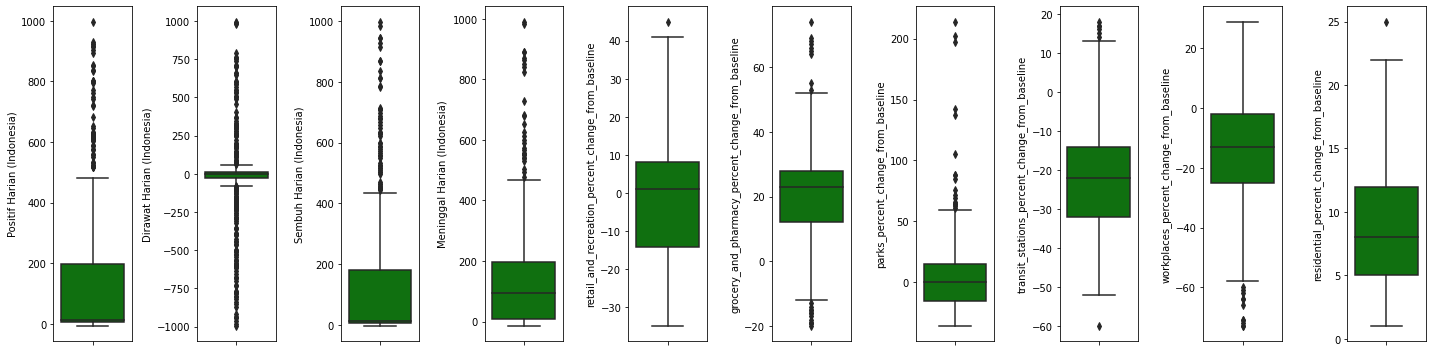

In [ ]:
# Individual Boxplots from Indonesia with Frequency
numerical_df_idn_f = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

plt.figure(figsize=(20,5))
for i in range(0, len(numerical_df_idn_f)):
  plt.subplot(1, len(numerical_df_idn_f), i+1)
  sns.boxplot(y=df_idn_f[numerical_df_idn_f[i]], color='green', orient='v')
  plt.tight_layout()

- Seluruh column menunjukkan adanya outlier yang cukup ekstrem, kecuali column `retail_and_recreation_percent_change_from_baseline` dan `residential_percent_change_from_baseline`
- Dari boxplot tersebut, terlihat adanya distribusi yang tidak simetrik atau skewed pada column `Positif Harian (Indonesia)`, `Sembuh Harian (Indonesia)`, `Meninggal Harian (Indonesia)`, `parks_percent_change_from_baseline` yang ditandai dengan lokasi box yang jauh dari daerah tengah sumbu Y.

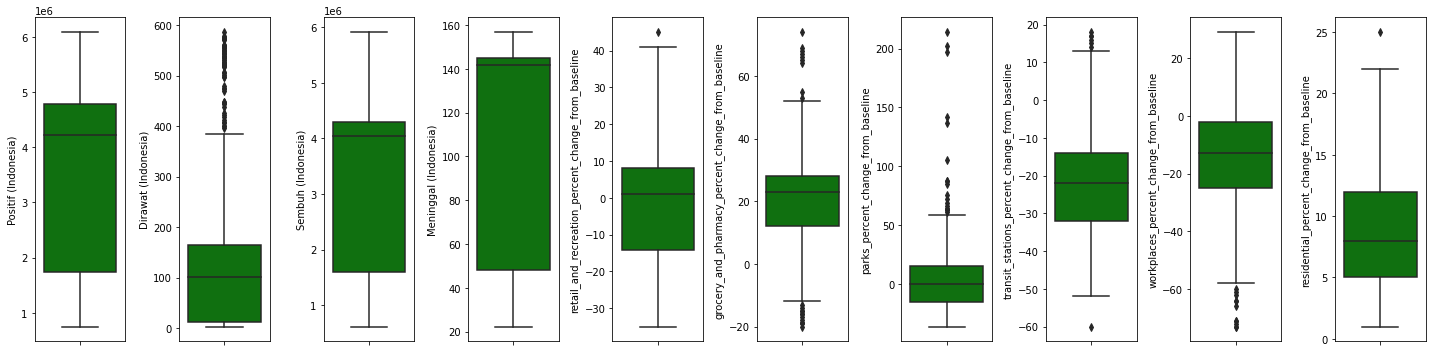

In [ ]:
# Individual Boxplots from Indonesia with Cumulative Frequency
numerical_df_idn_cf = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

plt.figure(figsize=(20,5))
for i in range(0, len(numerical_df_idn_cf)):
  plt.subplot(1, len(numerical_df_idn_cf), i+1)
  sns.boxplot(y=df_idn_cf[numerical_df_idn_cf[i]], color='green', orient='v')
  plt.tight_layout()

- Column `Positif (Indonesia)`, `Sembuh (Indonesia)`, dan `Meninggal (Indonesia)` tidak menunjukkan adanya outlier, serta mengindikasikan distribusi nilai yang cenderung simetris, meskipun nilai median/Q2 nya tidak sepenuhnya simetris.
- Column `Dirawat (Indonesia)` memiliki distribusi nilai yang tidak simetris, serta memiliki cukup banyak outliers yang ditandai dengan lokasi box yang jauh dari daerah tengah sumbu Y.

## **Multivariate Analysis**
Untuk melakukan analisis terhadap beberapa kolom sekaligus pada suatu dataframe untuk menganalisis hubungan/ korelasi antar kolom.

### **Correlation Heatmap Analysis**

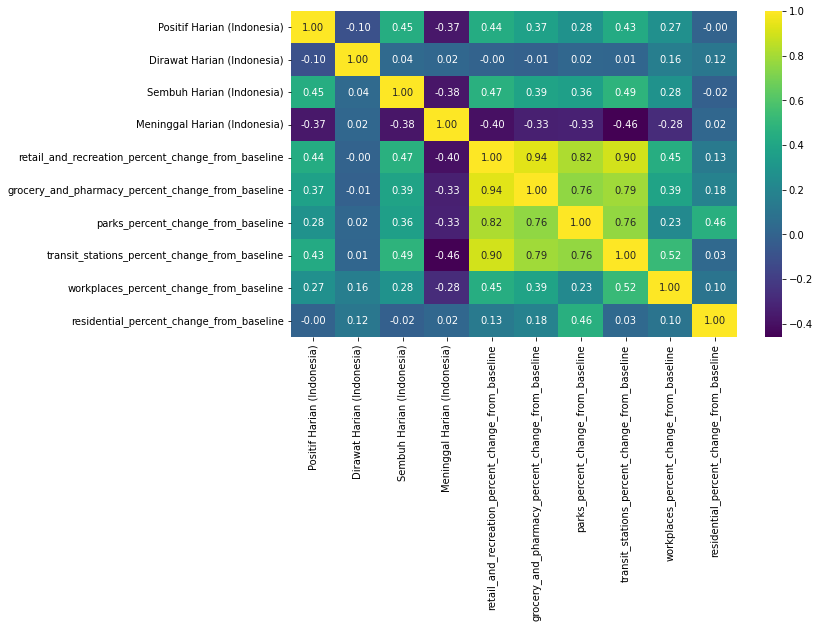

In [ ]:
# Correlation Heatmap from Indonesia with Frequency
plt.figure(figsize=(10,6))
sns.heatmap(df_idn_f.corr(), cmap='viridis', annot=True, fmt='.2f')

-	Tidak terdapat korelasi kuat antara kelompok variabel independent (kasus covid-19) terhadap variabel dependen (data mobilitas).
-	Namun dari seluruh variabel dependen, terlihat bahwa variabel `retail_and_recreation_percent_change_from_baseline` dan `transit_stations_percent_change_from_baseline` memiliki korelasi positif maupun negatif tertinggi dengan seluruh variabel independent, terkecuali variabel `Dirawat Harian (Indonesia)`
- Variabel `residential_percent_change_from_baseline` memiliki korelasi yang sangat rendah, atau bahkan tidak terlihat adanya korelasi dengan seluruh variabel independen
- Variabel `Dirawat Harian (Indonesia)` memiliki korelasi yang sangat rendah, atau bahkan tidak terlihat adanya korelasi dengan seluruh variabel dependen.

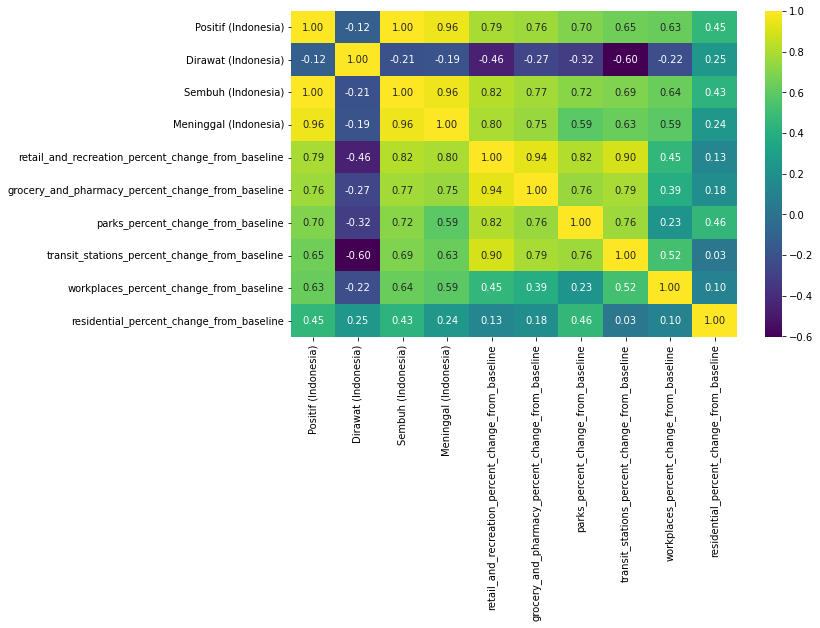

In [ ]:
# Correlation Heatmap from Indonesia with Cumulative Frequency
plt.figure(figsize=(10,6))
sns.heatmap(df_idn_cf.corr(), cmap='viridis', annot=True, fmt='.2f')

-	Seluruh variabel independen kecuali variabel `Dirawat (Indonesia)` memiliki korelasi positif tergolong kuat terhadap hampir seluruh variabel dependen kecuali variabel `residential_percent_change_from_baseline`.
-	Variabel independen `Positif (Indonesia)`, `Sembuh (Indonesia)`, dan `Meninggal (Indonesia)` saling memiliki korelasi positif yang kuat. Ada kemungkinan ketiga variabel ini redundan.

# **Modelling**

## **Import Model**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## **Logistic Regression**

### **Dataframe Indonesia with Frequency**

In [ ]:
labeled_df_idn_f.head(5)

,country_region,Tanggal,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,8.072,1.042,6.839,191.0,0,0,1,0,0,1
1,Indonesia,2021-02-01,7.203,-605.000,7.582,226.0,0,1,1,0,0,1
2,Indonesia,2021-03-01,6.877,279.000,6.419,179.0,0,0,0,0,0,1
3,Indonesia,2021-04-01,6.753,-590.000,7.166,177.0,0,1,0,0,0,1
4,Indonesia,2021-05-01,7.445,604.000,6.643,198.0,0,1,0,0,0,1


### **Accuracy of Retail and Recreation**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_retail_and_recreation_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_retail_and_recreation_percent_change_from_baseline = labeled_df_idn_f.retail_and_recreation_percent_change_from_baseline

X_train_retail_and_recreation_percent_change_from_baseline, X_test_retail_and_recreation_percent_change_from_baseline, Y_train_retail_and_recreation_percent_change_from_baseline, Y_test_retail_and_recreation_percent_change_from_baseline = train_test_split(x_retail_and_recreation_percent_change_from_baseline, y_retail_and_recreation_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_retail_and_recreation_percent_change_from_baseline, y_retail_and_recreation_percent_change_from_baseline)
dataCheck.coef_

array([[ 0.00682376, -0.00015926,  0.01681733, -0.00284432]])

In [ ]:
# Checking Model Accuracy
y_pred_retail_and_recreation = dataCheck.predict(x_retail_and_recreation_percent_change_from_baseline)

logistic_regression_accuracy = dataCheck.score(X_test_retail_and_recreation_percent_change_from_baseline, Y_test_retail_and_recreation_percent_change_from_baseline) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 71.32%


### **Accuracy of Grocery and Pharmacy**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_grocery_and_pharmacy_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_grocery_and_pharmacy_percent_change_from_baseline = labeled_df_idn_f.grocery_and_pharmacy_percent_change_from_baseline

X_train_grocery_and_pharmacy_percent_change_from_baseline, X_test_grocery_and_pharmacy_percent_change_from_baseline, Y_train_grocery_and_pharmacy_percent_change_from_baseline, Y_test_grocery_and_pharmacy_percent_change_from_baseline = train_test_split(x_grocery_and_pharmacy_percent_change_from_baseline, y_grocery_and_pharmacy_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_grocery_and_pharmacy_percent_change_from_baseline, y_grocery_and_pharmacy_percent_change_from_baseline)
dataCheck.coef_

array([[ 0.01005342,  0.00033651,  0.04501736, -0.0018568 ]])

In [ ]:
# Checking Model Accuracy

y_pred_grocery_and_pharmacy = dataCheck.predict(x_grocery_and_pharmacy_percent_change_from_baseline)

logistic_regression_accuracy = dataCheck.score(X_test_grocery_and_pharmacy_percent_change_from_baseline, Y_test_grocery_and_pharmacy_percent_change_from_baseline) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 91.91%


### **Accuracy of Parks**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_parks_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_parks_percent_change_from_baseline = labeled_df_idn_f.parks_percent_change_from_baseline

X_train_parks_percent_change_from_baseline, X_test_parks_percent_change_from_baseline, Y_train_parks_percent_change_from_baseline, Y_test_parks_percent_change_from_baseline = train_test_split(x_parks_percent_change_from_baseline, y_parks_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_parks_percent_change_from_baseline, y_parks_percent_change_from_baseline)
dataCheck.coef_

array([[ 0.00171921,  0.00032803,  0.00133119, -0.00520301]])

In [ ]:
# Checking Model Accuracy

y_pred_parks = dataCheck.predict(x_parks_percent_change_from_baseline)

logistic_regression_accuracy = dataCheck.score(X_test_parks_percent_change_from_baseline, Y_test_parks_percent_change_from_baseline) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 67.65%


### **Accuracy of Transit Stations**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_transit_stations_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_transit_stations_percent_change_from_baseline = labeled_df_idn_f.transit_stations_percent_change_from_baseline

X_train_transit_stations_percent_change_from_baseline, X_test_transit_stations_percent_change_from_baseline, Y_train_transit_stations_percent_change_from_baseline, Y_test_transit_stations_percent_change_from_baseline = train_test_split(x_transit_stations_percent_change_from_baseline, y_transit_stations_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_transit_stations_percent_change_from_baseline, y_transit_stations_percent_change_from_baseline)
dataCheck.coef_

array([[ 0.00055461, -0.00372629,  0.00175062, -0.03598581]])

In [ ]:
# Checking Model Accuracy

y_pred_transit_stations = dataCheck.predict(x_transit_stations_percent_change_from_baseline)

logistic_regression_accuracy = dataCheck.score(X_test_transit_stations_percent_change_from_baseline, Y_test_transit_stations_percent_change_from_baseline) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 94.85%


### **Accuracy of Workplaces**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_workplaces_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_workplaces_percent_change_from_baseline = labeled_df_idn_f.workplaces_percent_change_from_baseline

X_train_workplaces_percent_change_from_baseline, X_test_workplaces_percent_change_from_baseline, Y_train_workplaces_percent_change_from_baseline, Y_test_workplaces_percent_change_from_baseline = train_test_split(x_workplaces_percent_change_from_baseline, y_workplaces_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_workplaces_percent_change_from_baseline, y_workplaces_percent_change_from_baseline)
dataCheck.coef_

array([[-2.91575308e-05,  1.58582866e-03,  1.28013383e-03,
        -4.79129379e-03]])

In [ ]:
# Checking Model Accuracy

y_pred_workplaces = dataCheck.predict(x_workplaces_percent_change_from_baseline)

logistic_regression_accuracy = dataCheck.score(X_test_workplaces_percent_change_from_baseline, Y_test_workplaces_percent_change_from_baseline) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 74.26%


### **Accuracy of Residential**

Column `residential_percent_change_from_baseline` tidak menunjukkan value negatif yang cukup, sehingga probabilitasnya hampir mencapai 100% menunjukkan value positif.

### **Dataframe Indonesia with Cumulative Frequency**

In [ ]:
labeled_df_idn_cf.head(5)

,country_region,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,2021-01-01,751270.0,111.005,617936.0,22.329,0,0,1,0,0,1
1,Indonesia,2021-02-01,758473.0,110.400,625518.0,22.555,0,1,1,0,0,1
2,Indonesia,2021-03-01,765350.0,110.679,631937.0,22.734,0,0,0,0,0,1
3,Indonesia,2021-04-01,772103.0,110.089,639103.0,22.911,0,1,0,0,0,1
4,Indonesia,2021-05-01,779548.0,110.693,645746.0,23.109,0,1,0,0,0,1


### **Accuracy of Retail and Recreation**

In [ ]:
# Split dataframe

independent_variable = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']
x_rr_cf = labeled_df_idn_cf[independent_variable]
y_rr_cf = labeled_df_idn_cf.retail_and_recreation_percent_change_from_baseline

X_train_rr_cf, X_test_rr_cf, Y_train_rr_cf, Y_test_rr_cf = train_test_split(x_rr_cf, y_rr_cf, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_rr_cf, y_rr_cf)
dataCheck.coef_

array([[-9.70973178e-06, -2.02354257e-08,  1.06468855e-05,
        -1.21188118e-10]])

In [ ]:
# Checking Model Accuracy

y_pred = dataCheck.predict(x_rr_cf)

logistic_regression_accuracy = dataCheck.score(X_test_rr_cf, Y_test_rr_cf) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 84.56%


### **Accuracy of Grocery and Pharmacy**

In [ ]:
# Split dataframe

independent_variable = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']
x_gp_cf = labeled_df_idn_cf[independent_variable]
y_gp_cf = labeled_df_idn_cf.grocery_and_pharmacy_percent_change_from_baseline

X_train_gp_cf, X_test_gp_cf, Y_train_gp_cf, Y_test_gp_cf = train_test_split(x_gp_cf, y_gp_cf, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_gp_cf, y_gp_cf)
dataCheck.coef_

array([[-1.10147512e-05, -2.50227184e-08,  1.40988321e-05,
        -9.08658930e-11]])

In [ ]:
# Checking Model Accuracy

y_pred = dataCheck.predict(x_gp_cf)

logistic_regression_accuracy = dataCheck.score(X_test_gp_cf, Y_test_gp_cf) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 91.91%


### **Accuracy of Parks**

In [ ]:
# Split dataframe

independent_variable = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']
x_p_cf = labeled_df_idn_cf[independent_variable]
y_p_cf = labeled_df_idn_cf.parks_percent_change_from_baseline

X_train_p_cf, X_test_p_cf, Y_train_p_cf, Y_test_p_cf = train_test_split(x_p_cf, y_p_cf, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_p_cf, y_p_cf)
dataCheck.coef_

array([[-6.90504780e-06, -1.36774831e-08,  7.53185197e-06,
        -7.59413163e-10]])

In [ ]:
# Checking Model Accuracy

y_pred = dataCheck.predict(x_p_cf)

logistic_regression_accuracy = dataCheck.score(X_test_p_cf, Y_test_p_cf) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 83.09%


### **Accuracy of Transit and Stasions**

In [ ]:
# Split dataframe

independent_variable = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']
x_ts_cf = labeled_df_idn_cf[independent_variable]
y_ts_cf = labeled_df_idn_cf.transit_stations_percent_change_from_baseline

X_train_ts_cf, X_test_ts_cf, Y_train_ts_cf, Y_test_ts_cf = train_test_split(x_ts_cf, y_ts_cf, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_ts_cf, y_ts_cf)
dataCheck.coef_

array([[-1.17236315e-04, -2.24121295e-07,  1.20296429e-04,
        -1.34108718e-08]])

In [ ]:
# Checking Model Accuracy

y_pred = dataCheck.predict(x_ts_cf)

logistic_regression_accuracy = dataCheck.score(X_test_ts_cf, Y_test_ts_cf) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 94.85%


### **Accuracy of Workplaces**

In [ ]:
# Split dataframe

independent_variable = ['Positif (Indonesia)', 'Dirawat (Indonesia)', 'Sembuh (Indonesia)', 'Meninggal (Indonesia)']
x_w_cf = labeled_df_idn_cf[independent_variable]
y_w_cf = labeled_df_idn_cf.workplaces_percent_change_from_baseline

X_train_w_cf, X_test_w_cf, Y_train_w_cf, Y_test_w_cf = train_test_split(x_w_cf, y_w_cf, test_size = 0.25, random_state=0)

In [ ]:
# Create Model

dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_w_cf, y_w_cf)
dataCheck.coef_

array([[-7.85930820e-06, -1.43604752e-08,  8.14484510e-06,
        -1.64368357e-09]])

In [ ]:
# Checking Model Accuracy

y_pred = dataCheck.predict(x_w_cf)

logistic_regression_accuracy = dataCheck.score(X_test_w_cf, Y_test_w_cf) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')

Accuracy: 74.26%


### **Accuracy of Residential**

Column `residential_percent_change_from_baseline` tidak menunjukkan value negatif yang cukup, sehingga probabilitasnya hampir mencapai 100% menunjukkan value positif.

## **Decision Tree**

### **Dataframe Indonesia with Frequency**

### **Accuracy of Retail and Recreation**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_retail_and_recreation_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_retail_and_recreation_percent_change_from_baseline = labeled_df_idn_f.retail_and_recreation_percent_change_from_baseline

X_train_retail_and_recreation_percent_change_from_baseline, X_test_retail_and_recreation_percent_change_from_baseline, Y_train_retail_and_recreation_percent_change_from_baseline, Y_test_retail_and_recreation_percent_change_from_baseline = train_test_split(x_retail_and_recreation_percent_change_from_baseline, y_retail_and_recreation_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_retail_and_recreation_percent_change_from_baseline, Y_train_retail_and_recreation_percent_change_from_baseline)
#rr = retail_and_recreation
#dt = decision tree
y_pred_rr_dt = classifier.predict(X_test_retail_and_recreation_percent_change_from_baseline)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_retail_and_recreation_percent_change_from_baseline, y_pred_rr_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 85.29%


### **Accuracy of Grocery and Pharmacy**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_grocery_and_pharmacy_percent_change_from_baseline, Y_train_grocery_and_pharmacy_percent_change_from_baseline)
#gp = grocery_and_pharmacy
#dt = decision tree
y_pred_gp_dt = classifier.predict(X_test_grocery_and_pharmacy_percent_change_from_baseline)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_grocery_and_pharmacy_percent_change_from_baseline, y_pred_gp_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 90.44%


### **Accuracy of Parks**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_parks_percent_change_from_baseline, Y_train_parks_percent_change_from_baseline)
#p = parks
#dt = decision tree
y_pred_p_dt = classifier.predict(X_test_parks_percent_change_from_baseline)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_parks_percent_change_from_baseline, y_pred_p_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 72.79%


### **Accuracy of Transit Stasions**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_transit_stations_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_transit_stations_percent_change_from_baseline = labeled_df_idn_f.transit_stations_percent_change_from_baseline

X_train_transit_stations_percent_change_from_baseline, X_test_transit_stations_percent_change_from_baseline, Y_train_transit_stations_percent_change_from_baseline, Y_test_transit_stations_percent_change_from_baseline = train_test_split(x_transit_stations_percent_change_from_baseline, y_transit_stations_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_transit_stations_percent_change_from_baseline, Y_train_transit_stations_percent_change_from_baseline)
#ts = transit stations
#dt = decision tree
y_pred_ts_dt = classifier.predict(X_test_transit_stations_percent_change_from_baseline)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_transit_stations_percent_change_from_baseline, y_pred_ts_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 94.85%


### **Accuracy of Workplaces**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_workplaces_percent_change_from_baseline, Y_train_workplaces_percent_change_from_baseline)
#w = workplaces
#dt = decision tree
y_pred_w_dt = classifier.predict(X_test_workplaces_percent_change_from_baseline)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_workplaces_percent_change_from_baseline, y_pred_w_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 80.15%


### **Accuracy of Residential**

Column `residential_percent_change_from_baseline` tidak menunjukkan value negatif yang cukup, sehingga probabilitasnya hampir mencapai 100% menunjukkan value positif.

### **Dataframe Indonesia with Cumulative Frequency**

### **Accuracy of Retail and Recreation**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_rr_cf, Y_train_rr_cf)
#rr = retail_and_recreation
#dt = decision tree
y_pred_rr_dt = classifier.predict(X_test_rr_cf)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_rr_cf, y_pred_rr_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 96.32%


### **Accuration of Grocery and Pharmacy**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_gp_cf, Y_train_rr_cf)
#gp = grocery_and_pharmacy
#dt = decision tree
y_pred_gp_dt = classifier.predict(X_test_gp_cf)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_gp_cf, y_pred_gp_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 61.03%


### **Accuracy of Parks**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_p_cf, Y_train_p_cf)
#p = parks
#dt = decision tree
y_pred_p_dt = classifier.predict(X_test_p_cf)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_p_cf, y_pred_p_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 90.44%


### **Accuracy of Transit Stasions**

In [ ]:
# Split dataframe

independent_variable = ['Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)', 'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)']
x_transit_stations_percent_change_from_baseline = labeled_df_idn_f[independent_variable]
y_transit_stations_percent_change_from_baseline = labeled_df_idn_f.transit_stations_percent_change_from_baseline

X_train_transit_stations_percent_change_from_baseline, X_test_transit_stations_percent_change_from_baseline, Y_train_transit_stations_percent_change_from_baseline, Y_test_transit_stations_percent_change_from_baseline = train_test_split(x_transit_stations_percent_change_from_baseline, y_transit_stations_percent_change_from_baseline, test_size = 0.25, random_state=0)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_ts_cf, Y_train_ts_cf)
#ts = transit stations
#dt = decision tree
y_pred_ts_dt = classifier.predict(X_test_ts_cf)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_ts_cf, y_pred_ts_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 99.26%


### **Accuracy of Workplaces**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train_w_cf, Y_train_w_cf)
#w = workplaces
#dt = decision tree
y_pred_w_dt = classifier.predict(X_test_w_cf)

In [ ]:
# Checking Model Accuracy

decision_tree_accuracy = metrics.accuracy_score(Y_test_w_cf, y_pred_w_dt)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')

Accuracy: 94.12%


### **Accuracy of Residential**

Column `residential_percent_change_from_baseline` tidak menunjukkan value negatif yang cukup, sehingga probabilitasnya hampir mencapai 100% menunjukkan value positif.

## **Overall Models Accuracy**

### **Logistic Regression**

- Dataframe Indonesia with Frequency =  79,998%
- Dataframe Indonesia with Cummulative Frequency = 85,734%


Logistic Regression average accuracy = 82,866%

### **Decision Tree**

- Dataframe Indonesia with Frequency =  84,704%
- Dataframe Indonesia with Cummulative Frequency = 87,94%


Decision Tree average accuracy = 86,322%

# **Conclusion**

- Berdasarkan pengujian tingkat akurasi data pada tahap modelling, kedua model (Logistic Regression dan Decision Tree) memberikan tingkat akurasi yang layak terkait data yang digunakan. Namun, model yang menunjukkan akurasi terbaik adalah model **Decision Tree**. Dimana, kami ingin memprediksi kemungkinan terjadinya mobility pada masing-masing sektor terhadap data yang diperoleh dari variabel independen.
- Dari model yang kami gunakan (Decision Tree), dataframe yang menunjukkan akurasi terbaik adalah **dataframe Indonesia dengan frekuensi kumulatif** (3.236% lebih tinggi dari dataframe Indonesia dengan frekuensi harian). Hal ini menunjukkan bahwa **tingkat mobilitas penduduk Indonesia lebih dipengaruhi oleh jumlah kasus kumulatif**, dibandingkan kenaikan kasus harian Covid-19.
- Tingkat mobilitas yang terjadi di sektor residential tidak menunjukkan nilai negatif yang cukup, sehingga tidak dapat diprediksi dan tidak memerlukan prediksi. Dalam hal ini, **variabel independen sama sekali tidak mempengaruhi variabel residensial**.
- Berdasarkan hasil analisis yang diperoleh dari dataframe Indonesia dengan frekuensi kumulatif, **hampir seluruh sektor yang ada (retail dan rekreasi, aktivitas di pertamanan, stasiun transit transportasi umum, dan tempat kerja) menunjukkan korelasi yang kuat** dengan data kumulatif kasus Covid-19 di Indonesia. Terkecuali, **sektor perbelanjaan dan kebutuhan sehari-hari yang menunjukkan korelasi yang cenderung rendah**.
- Sebagai penutup, berdasarkan data yang kami peroleh, **sebagian besar peningkatan kasus positif Covid-19 berpengaruh terhadap aktivitas yang dilakukan di tempat umum.** Maka dari itu, sebagai upaya pemulihan dari berbagai sektor tersebut tidak menutup kemungkinan untuk tetap menjalankan aktivitas secara terbatas dan dengan mematuhi protokol kesehatan.

# **Daftar Pusaka**

*   Annur, C. M. (2022, Maret 17). Imbas Gelombang Ketiga Covid-19, Mobilitas Penduduk di Februari 2022 Menurun. Databooks. Diperoleh dari https://databoks.katadata.co.id/datapublish/2022/03/17/imbas-gelombang-ketiga-covid-19-mobilitas-penduduk-di-februari-2022-menurun

*   Covid-19 1 Februari 2022 Melonjak Tinggi, Akhir Bulan Ini Bisa 100.000 Per Hari, (2022, Februari 2). Kontan.co.id. Diakses dari https://nasional.kontan.co.id/news/covid-19-1-februari-2022-melonjak-tinggi-akhir-bulan-ini-bisa-100000-per-hari

*   Firdaus, A. (2022, Juni 13). Epidemiolog sebut BA.4 dan BA.5 punya peluang picu gelombang lanjutan. Antara News. Diakses dari https://www.antaranews.com/berita/2936657/epidemiolog-sebut-ba4-dan-ba5-punya-peluang-picu-gelombang-lanjutan#mobile-src 

*   Indonesia Resmi Masuk Gelombang Ketiga Covid-19, (2022 Februari 1). CNN Indonesia. Diakses dari https://www.cnnindonesia.com/nasional/20220201162952-20-753758/indonesia-resmi-masuk-gelombang-ketiga-covid-19

*   Jaga Aktivitas Ekonomi selama Ramadan, Pemerintah Tetap Awasi dan Kendalikan Pandemi, (2022, April 4). Kementrian Komunikasi dan Informatika Republik Indonesia. Diakses dari https://kominfo.go.id/content/detail/40996/jaga-aktivitas-ekonomi-selama-ramadan-pemerintah-tetap-awasi-dan-kendalikan-pandemi/0/berita 

*   JHU CSSE COVID-19 Data. (2022), Diakses dari https://github.com/CSSEGISandData/COVID-19. 

*   Nasution, D. D., Alamsyah, I. E. (2022, April 1). BPS: Mobilitas Warga di Lokasi Rekreasi Lebih Tinggi dari Sebelum Pandemi. Republika.co.id. Diakses dari https://www.republika.co.id/berita/r9nnth349/bps-mobilitas-warga-di-lokasi-rekreasi-lebih-tinggi-dari-sebelum-pandemi 

*   Nugroho, A. (2022). Pakar UGM: Waspadai Omicron Varian BA4 dan BA5. Diakses pada 29 Juni 2022, dari https://ugm.ac.id/id/berita/22601-pakar-ugm-waspadai-omicron-varian-ba4-dan-ba5 

*   Putri, C.A. (2022, Juni 11). Kronologi & Gejala Omicron BA.4 dan BA.5 yang Sudah Masuk RI. CNBC Indonesia. Diakses dari https://www.cnbcindonesia.com/news/20220611180551-4-346234/kronologi-gejala-omicron-ba4-dan-ba5-yang-sudah-masuk-ri 

*   Supriatin. (2022, Maret 26). Data Vaksinasi Covid-19 Per 26 Maret 2022. Merdeka.com. Diakses dari https://www.merdeka.com/peristiwa/data-vaksinasi-covid-19-per-26-maret-2022.html 